0.0
25.40852813825492
60.98046753181182


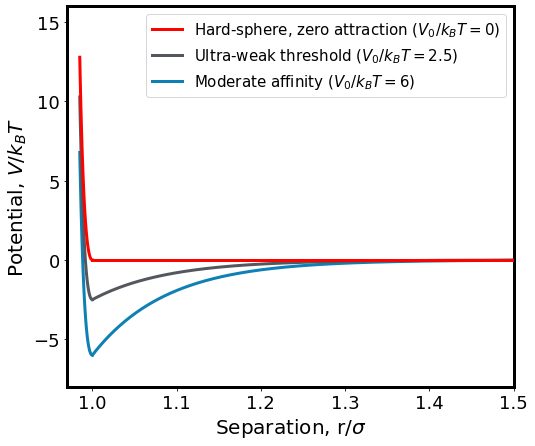

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.colors as colors
from scipy import stats

%matplotlib inline

z = 10.4
sigma = 1
fig, ax = plt.subplots()

eps = 0.0
r1 = np.linspace(0.985,1,100)
U_morse = 6*( 1 - np.exp( -60*(r1-sigma) ) )**2 - eps
r2 = np.linspace(1,1.5,300)
U_DH = - eps*sigma/r2*np.exp(-z*(r2/sigma-1))
plt.plot(r1, U_morse, color='#FE0200', zorder=6, linewidth=3, label='Hard-sphere, zero attraction ($V_0/k_BT = 0$)')
plt.plot(r2, U_DH, color='#FE0200', zorder=5, linewidth=3)
print(eps*np.exp(-z*(1.01/sigma-1))*(sigma/(1.01**2) + z/1.01))

eps = 2.5
r1 = np.linspace(0.985,1,100)
U_morse = 6*( 1 - np.exp( -60*(r1-sigma) ) )**2 - eps
r2 = np.linspace(1,1.5,300)
U_DH = - eps*sigma/r2*np.exp(-z*(r2/sigma-1))
plt.plot(r1, U_morse, color='#54585E', zorder=4, linewidth=3, label='Ultra-weak threshold ($V_0/k_BT = 2.5$)')
plt.plot(r2, U_DH, color='#54585E', zorder=3, linewidth=3)
print(eps*np.exp(-z*(1.01/sigma-1))*(sigma/(1.01**2) + z/1.01))

eps = 6
r1 = np.linspace(0.985,1,100)
U_morse = 6*( 1 - np.exp( -60*(r1-sigma) ) )**2 - eps
r2 = np.linspace(1,1.5,300)
U_DH = - eps*sigma/r2*np.exp(-z*(r2/sigma-1))
plt.plot(r1, U_morse, color='#0E80B4', zorder=2, linewidth=3, label='Moderate affinity ($V_0/k_BT = 6$)')
plt.plot(r2, U_DH, color='#0E80B4', zorder=1, linewidth=3)
print(eps*np.exp(-z*(1.01/sigma-1))*(sigma/(1.01**2) + z/1.01))

t = ax.yaxis.get_offset_text()
t.set_size(15)
t = ax.xaxis.get_offset_text()
t.set_size(15)
ax.set_xlabel('Separation, r/$\sigma$',size=20)
ax.set_ylabel('Potential, $V/k_BT$',size=20)
for ax in [ax]:
    ax.spines['left'].set_linewidth(3)
    ax.spines['bottom'].set_linewidth(3)
    ax.spines['top'].set_linewidth(3)
    ax.spines['right'].set_linewidth(3)
    ax.tick_params(axis='both', which='major', labelsize=18)

ax.legend(prop={'size': 15})

ax.set_xlim(0.9,3)
ax.set_ylim(0,2.6)
    
ax.set_xlim(0.97,1.5)
ax.set_ylim(-8,16)
        
fig.set_size_inches(8, 7)
plt.savefig('./images/potentials.png', bbox_inches='tight', dpi=300)

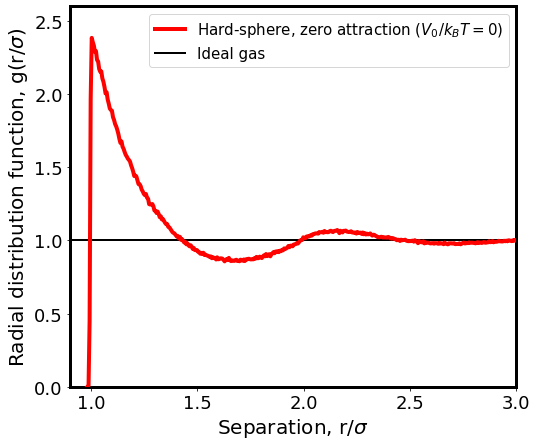

In [3]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.colors as colors
from scipy import stats
from scipy import integrate

%matplotlib inline

g_r_HS_LAMMPS = np.loadtxt('../FIGS1__EncounterCriterion/g_r_HS_LAMMPS.txt')
sep = np.array(g_r_HS_LAMMPS[:,0])
g_r_HS_LAMMPS = g_r_HS_LAMMPS[:,1]

fig, ax = plt.subplots()
plt.plot(sep, g_r_HS_LAMMPS, color='#FE0200', zorder=3, linewidth=4, label='Hard-sphere, zero attraction ($V_0/k_BT = 0$)')
plt.plot([0,8], [1,1], color='k', zorder=1, linewidth=2, label='Ideal gas')
ax.legend(prop={'size': 15})

t = ax.yaxis.get_offset_text()
t.set_size(15)
t = ax.xaxis.get_offset_text()
t.set_size(15)
ax.set_xlabel('Separation, r/$\sigma$',size=20)
ax.set_ylabel('Radial distribution function, g(r/$\sigma$)',size=20)
for ax in [ax]:
    ax.spines['left'].set_linewidth(3)
    ax.spines['bottom'].set_linewidth(3)
    ax.spines['top'].set_linewidth(3)
    ax.spines['right'].set_linewidth(3)
    ax.tick_params(axis='both', which='major', labelsize=18)
    
ax.set_xlim(0.9,3)
ax.set_ylim(0,2.6)
        
fig.set_size_inches(8,7)
plt.savefig('./images/g_r.png', bbox_inches='tight', dpi=300)


[1.1811341381765292, 1.1222929684896488, 1.0116649315459076]


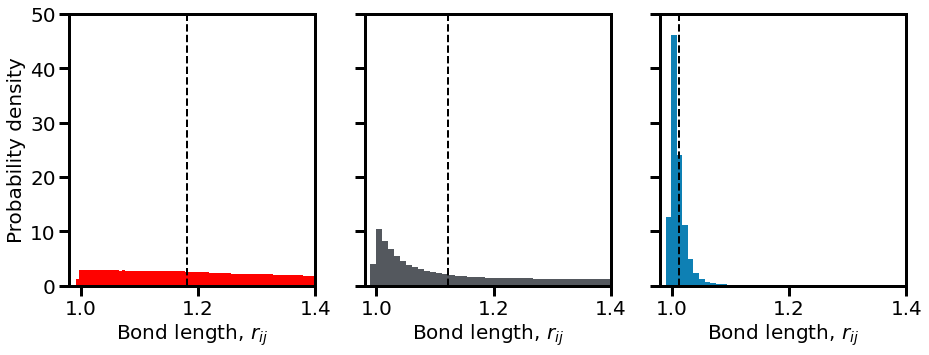

In [4]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.colors as colors
from scipy import stats
from scipy.optimize import curve_fit

%matplotlib inline
num_to_calc = 100
duration = 99999

pair_sep_time_e0 = np.loadtxt('../FIGS1__EncounterCriterion/pair_distance_time_f30_e0.txt')
pair_sep_time_e25 = np.loadtxt('../FIGS1__EncounterCriterion/pair_distance_time_f30_e2.5.txt')
pair_sep_time_e6 = np.loadtxt('../FIGS1__EncounterCriterion/pair_distance_time_f30_e6.txt')
time = np.arange(0,duration+1,1)
mult = 0.00001*4*0.0000000534
time = time*mult
cutoff = 1.4

fig, (ax1,ax2,ax3) = plt.subplots(1,3)
positions_e0 = []
positions_e25 = []
positions_e6 = []
for i in range(0,num_to_calc): # each pair trace
    for j in range(0,np.size(time)):    # each timestep along trace
        pair_e0 = pair_sep_time_e0[j,i]
        pair_e25 = pair_sep_time_e25[j,i]
        pair_e6 = pair_sep_time_e6[j,i]
        if (pair_e0 <= cutoff):
            positions_e0.append(pair_e0)
        if (pair_e25 <= cutoff):
            positions_e25.append(pair_e25)
        if (pair_e6 <= cutoff):
            positions_e6.append(pair_e6)

positions_e0 = np.asarray(positions_e0)
num_e0 = ((positions_e0 <= 1.2).sum())/np.size(positions_e0)
positions_e25 = np.asarray(positions_e25)
num_e25 = ((positions_e25 <= 1.2).sum())/np.size(positions_e25)
positions_e6 = np.asarray(positions_e6)
num_e6 = ((positions_e6 <= 1.2).sum())/np.size(positions_e6)
ax1.hist(positions_e0,bins=80, density=True,color='#FE0200')
ax2.hist(positions_e25,bins=40, density=True,color='#54585E')
ax3.hist(positions_e6,bins=40, density=True,color='#0E80B4')

pair_sep_dist_avg = [np.average(positions_e0), np.average(positions_e25), np.average(positions_e6)]
pair_sep_dist_std = [np.std(positions_e0), np.std(positions_e25), np.std(positions_e6)]
print(pair_sep_dist_avg)
ax1.plot([pair_sep_dist_avg[0],pair_sep_dist_avg[0]],[0,100000], color='k', linestyle='dashed', linewidth=2, zorder=20)
ax2.plot([pair_sep_dist_avg[1],pair_sep_dist_avg[1]],[0,100000], color='k', linestyle='dashed', linewidth=2, zorder=20)
ax3.plot([pair_sep_dist_avg[2],pair_sep_dist_avg[2]],[0,100000], color='k', linestyle='dashed', linewidth=2, zorder=20)

for ax in fig.get_axes():
    ax.set_xlabel('Bond length, $r_{ij}$',size=20)
    ax.set_ylabel('Probability density',size=20)
    ax.set_ylim(0,50)
    ax.set_xlim(0.98,cutoff)
    ax.spines['left'].set_linewidth(3)
    ax.spines['bottom'].set_linewidth(3)
    ax.spines['top'].set_linewidth(3)
    ax.spines['right'].set_linewidth(3)
    ax.tick_params(axis='both', which='major', labelsize=20,width=3,length=10)
    
for ax in fig.get_axes():
    ax.label_outer()
    
fig.set_size_inches(15, 5)
plt.savefig('./images/bond_length_time.png', bbox_inches='tight', dpi=300)
